<a href="https://colab.research.google.com/github/vekasheni/Project/blob/main/Amazon_Sale_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Reading csv file**

In [5]:
df=pd.read_csv('/content/Amazon Sale Report.csv',encoding= 'unicode_escape')

In [6]:
# Fetching shape
df.shape

(28188, 21)

In [7]:
# Fetching head (i.e,) by default first 5 rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,4/30/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,4/30/2022,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,4/30/2022,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [8]:
#Fetching tail (i.e,) by default last 5 rows
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
28183,28182,405-6739589-0085109,4/14/2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,518.0,"Port Blair , South Andaman",ANDAMAN & NICOBAR,744103.0,IN,False,NaN,NaN,NaN
28184,28183,406-9270205-0671502,4/14/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,...,INR,725.0,CHENNAI,TAMIL NADU,603210.0,IN,False,Easy Ship,NaN,NaN
28185,28184,405-8907037-1625161,4/14/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,...,INR,788.0,MANGALURU,KARNATAKA,574229.0,IN,False,Easy Ship,NaN,NaN
28186,28185,405-1581058-6357102,4/14/2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,612.0,MANGALURU,KARNATAKA,574229.0,IN,False,NaN,NaN,NaN
28187,28186,406-4771025-0145962,4/14/2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,3X,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Checking info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28188 entries, 0 to 28187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               28188 non-null  int64  
 1   Order ID            28188 non-null  object 
 2   Date                28188 non-null  object 
 3   Status              28188 non-null  object 
 4   Fulfilment          28188 non-null  object 
 5   Sales Channel       28188 non-null  object 
 6   ship-service-level  28188 non-null  object 
 7   Category            28188 non-null  object 
 8   Size                28188 non-null  object 
 9   Courier Status      28187 non-null  object 
 10  Qty                 28187 non-null  float64
 11  currency            26443 non-null  object 
 12  Amount              26443 non-null  float64
 13  ship-city           28175 non-null  object 
 14  ship-state          28175 non-null  object 
 15  ship-postal-code    28175 non-null  float64
 16  ship

In [10]:
# Drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [11]:
# Rechecking whether the columns are dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28188 entries, 0 to 28187
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               28188 non-null  int64  
 1   Order ID            28188 non-null  object 
 2   Date                28188 non-null  object 
 3   Status              28188 non-null  object 
 4   Fulfilment          28188 non-null  object 
 5   Sales Channel       28188 non-null  object 
 6   ship-service-level  28188 non-null  object 
 7   Category            28188 non-null  object 
 8   Size                28188 non-null  object 
 9   Courier Status      28187 non-null  object 
 10  Qty                 28187 non-null  float64
 11  currency            26443 non-null  object 
 12  Amount              26443 non-null  float64
 13  ship-city           28175 non-null  object 
 14  ship-state          28175 non-null  object 
 15  ship-postal-code    28175 non-null  float64
 16  ship

In [12]:
# checking null value
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
28184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
28186,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [13]:
# sum will give total values of null values
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            1
Qty                       1
currency               1745
Amount                 1745
ship-city                13
ship-state               13
ship-postal-code         13
ship-country             13
B2B                       1
fulfilled-by          18096
dtype: int64

In [14]:
# Checking shape of the dataframe
df.shape

(28188, 19)

In [15]:
# Drop null values
df.dropna(inplace=True)

In [16]:
# After dropping null values, checking shape of df
df.shape

(9642, 19)

In [17]:
# Fetching column names
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [18]:
# Change data type from float64 to int64
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [19]:
# Checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [41]:
df['Date']=pd.to_datetime (df['Date'])

In [21]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [22]:
# Rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1.0,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1.0,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28173,28172,406-2236581-6953969,2022-04-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,295.00,Ulhasnagar,MAHARASHTRA,421004,IN,False,Easy Ship
28175,28174,406-1800231-0427533,2022-04-14,Cancelled,Merchant,Amazon.in,Standard,Shirt,3XL,On the Way,0.0,INR,361.90,Ulhasnagar,MAHARASHTRA,421004,IN,False,Easy Ship
28182,28181,171-9260981-4111527,2022-04-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,L,Shipped,1.0,INR,631.00,MEERUT,UTTAR PRADESH,250001,IN,False,Easy Ship
28184,28183,406-9270205-0671502,2022-04-14,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,1.0,INR,725.00,CHENNAI,TAMIL NADU,603210,IN,False,Easy Ship


In [23]:
# Describe() method return description of the data in the DataFrame(i.e count,mean,std,min..etc)
df.describe()

,index,Qty,Amount,ship-postal-code
count,9642.000000,9642.000000,9642.000000,9642.000000
mean,13997.215308,0.866003,607.553021,457693.237295
std,7705.791335,0.354103,276.112088,197894.631835
min,0.000000,0.000000,0.000000,110001.000000
25%,7255.250000,1.000000,415.467500,323307.000000
50%,13864.000000,1.000000,568.000000,491998.000000
75%,20602.250000,1.000000,725.000000,600013.750000
max,28184.000000,5.000000,5495.000000,989898.000000


In [24]:
# Gives description of each columns
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,9642,9642,9642,9642,9642,9642,9642,9642,9642,9642,9642,9642,9642,9642
unique,8789,7,1,1,1,8,10,2,1,1973,48,1,2,1
top,408-3317403-1729937,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,10,7746,9642,9642,9642,4194,1866,8318,9642,698,1631,9642,9549,9642


In [25]:
# Use describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,9642.000000,9642.000000
mean,0.866003,607.553021
std,0.354103,276.112088
min,0.000000,0.000000
25%,1.000000,415.467500
50%,1.000000,568.000000
75%,1.000000,725.000000
max,5.000000,5495.000000


#**Exploratory Data Analysis**

In [26]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

**Plotting bar graph for size and count**

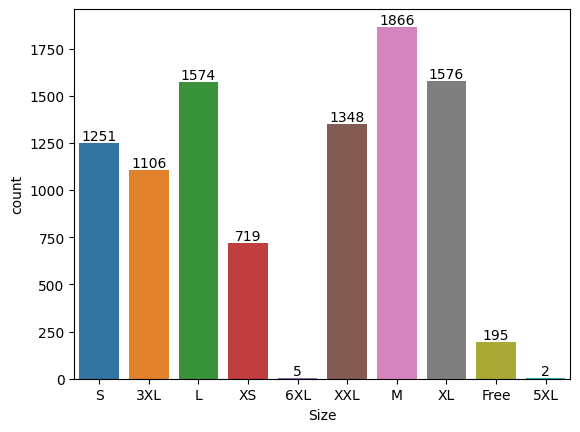

In [45]:
ax=sns.countplot(x='Size' ,data=df)
for bars in ax.containers:
    ax.bar_label(bars)

#### Note: From above Graph you can see that most of the people buys M-Size

#**Group By**

**The groupby() function in pandas is used to group data based on one or more columns in a DataFrame**

In [29]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
5,M,1619.0
4,L,1372.0
7,XL,1359.0
9,XXL,1188.0
6,S,1070.0
0,3XL,988.0
8,XS,583.0
3,Free,167.0
2,6XL,3.0
1,5XL,1.0


<Axes: xlabel='Size', ylabel='Qty'>

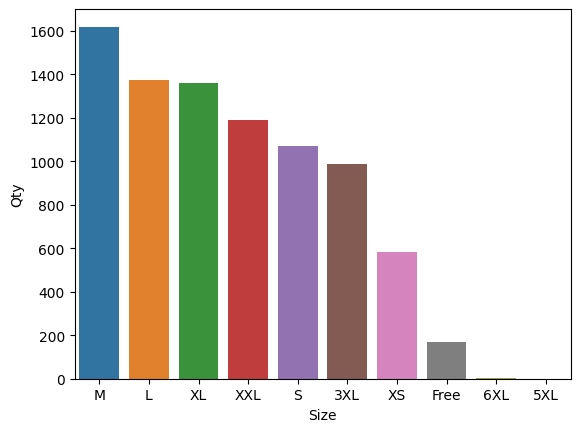

In [30]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

sns.barplot(x='Size',y='Qty', data=S_Qty)


##### **Note: From above Graph you can see that most of the Qty buys M-Size in the sales**

##**Courier Status**

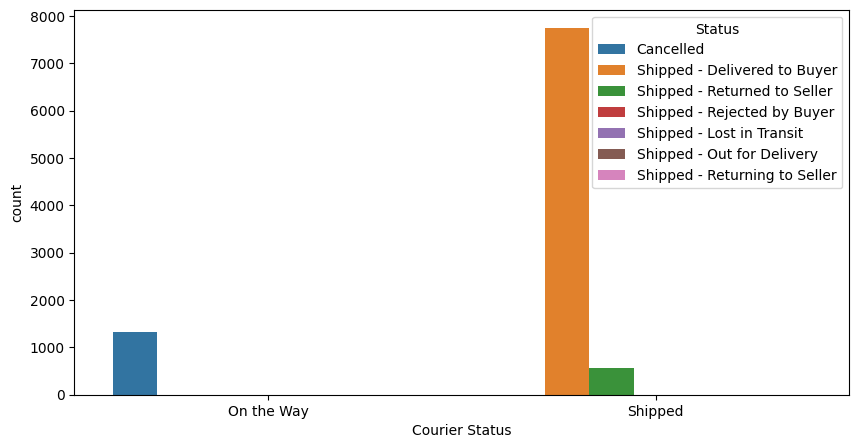

In [46]:
plt.figure(figsize=(10,5))

ax=sns.countplot(data=df, x='Courier Status',hue= 'Status')

plt.show()

**Note: From above Graph the majority of the orders are shipped through the courier.**

<Axes: >

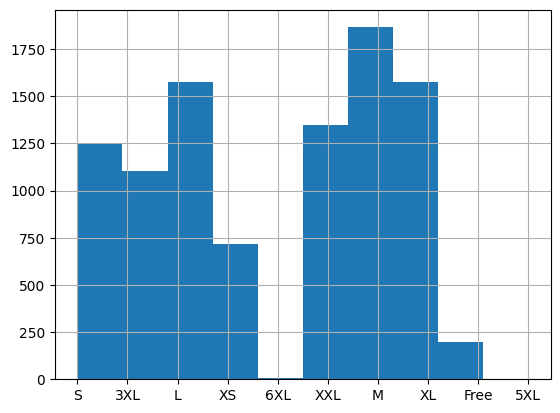

In [56]:
# Histogram
df['Size'].hist()

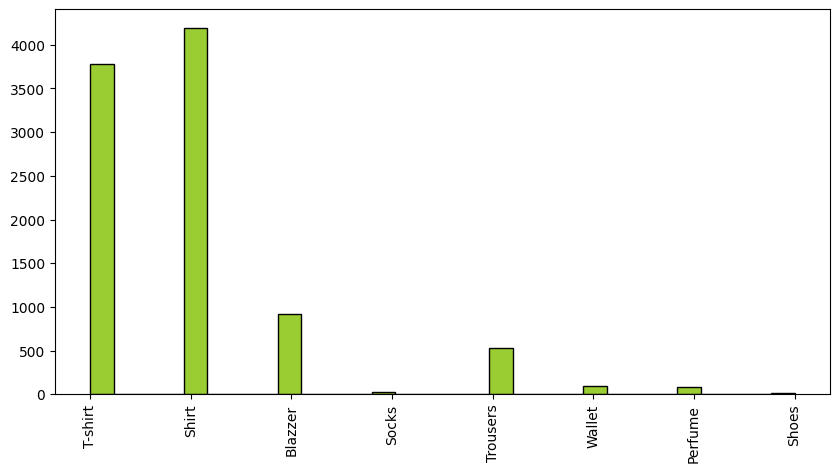

In [57]:
# Plot for category of items
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, color='Yellowgreen',edgecolor='Black')
plt.xticks(rotation=90)
plt.show()

**Note: From above Graph you can see that most of the  buyers are T-shirt**

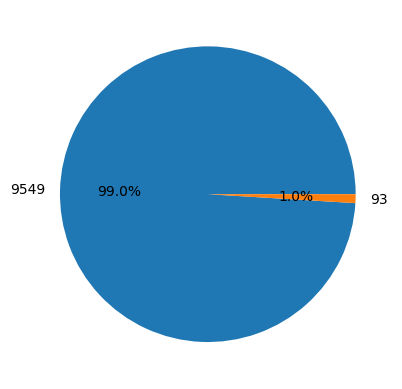

In [60]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

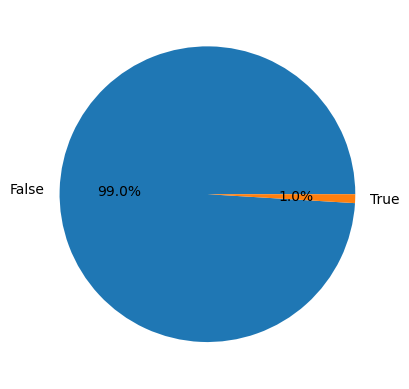

In [50]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()

#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
#plt.axis('equal')
plt.show()

**Note: From the above pie charts, we could conclude that 99.0% are retailers and 1.0% are B2B buyers.**

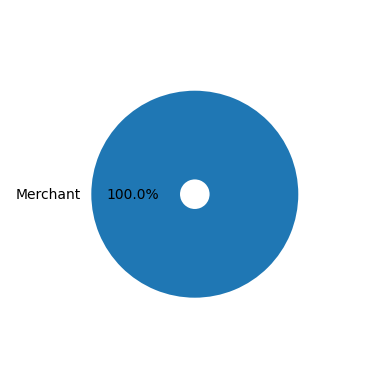

In [51]:
#  Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()

# Step 4: Plot the pie chart
fig, ax = plt.subplots()

ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")

plt.show()

**Note: From above chart you can see that most of the  Fulfilment  are through amazon**

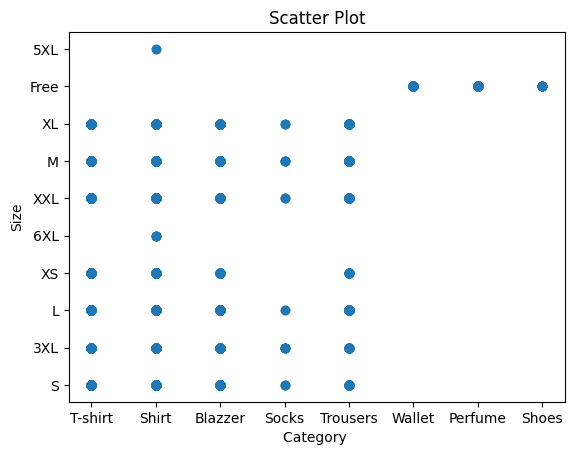

In [52]:
# Prepare data for scatter plot
x_data = df['Category']
y_data = df['Size']

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category ')
plt.ylabel('Size')
plt.title('Scatter Plot')
plt.show()

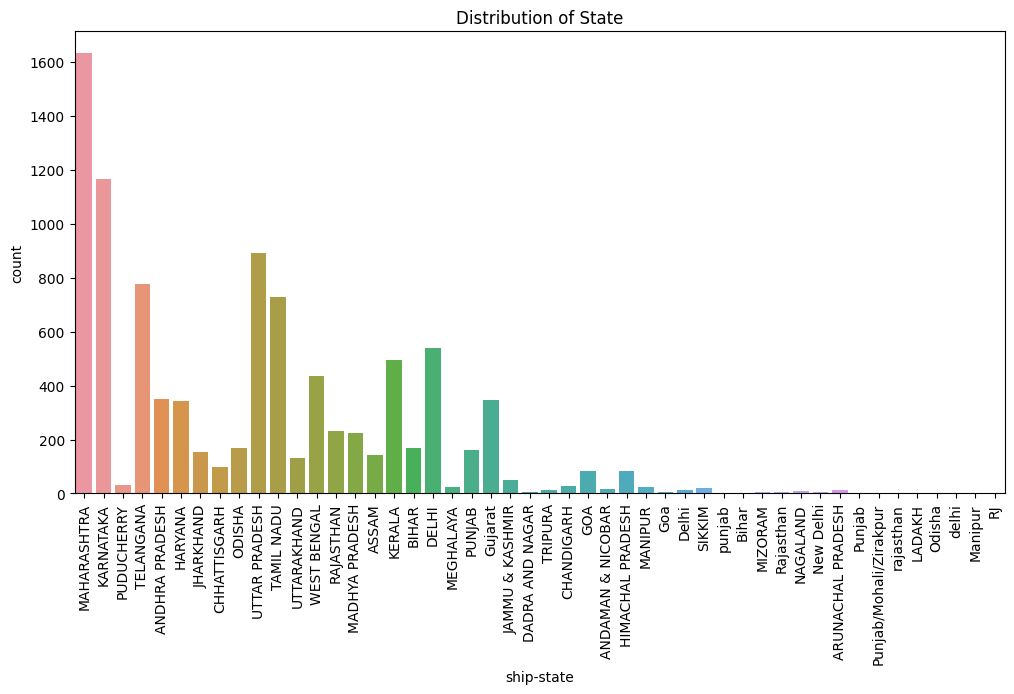

In [53]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

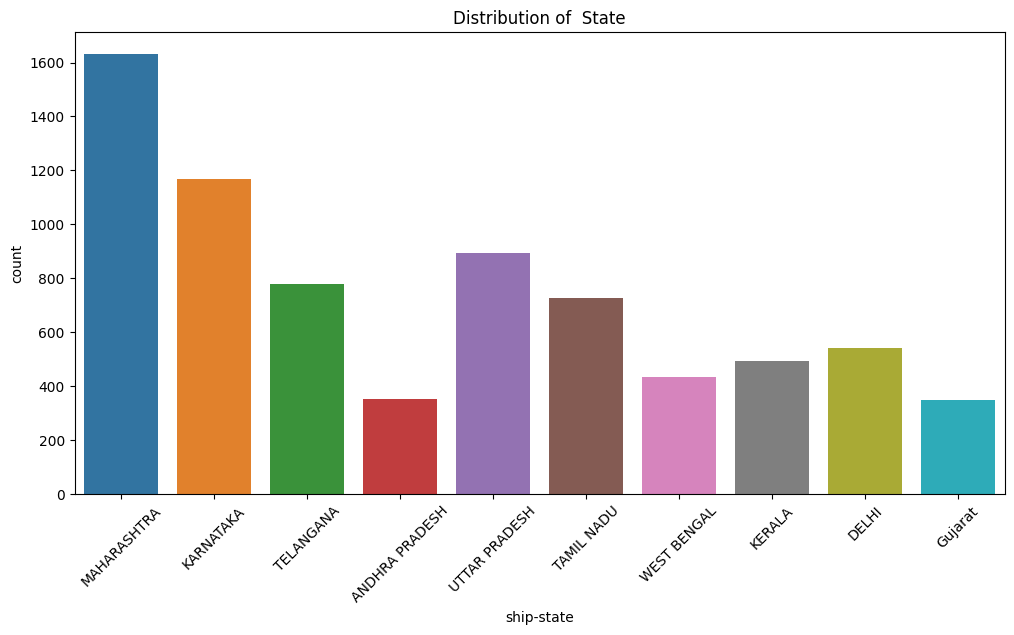

In [54]:
# top_10_States
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

#### **Note: From above Graph you can see that most of the  buyers are Maharashtra state**

# **Conclusion**

**The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.**